In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import data_preprocess as dp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv('./data/D2.csv')

In [3]:
df = dp.data_prep(data, verbose=True)

Running drop_columns_with_missing_values...
Running recode_medical_specialty...
Running recode_admission_type...
Running recode_discharge_disposition...
Running recode_admission_source...
Running recode_binary_values...
Running recode_drug_columns...
Running recode_age_column...
Running drop_deceased_patients...
Data preparation complete.


In [4]:
df.head()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,AfricanAmerican,1,8,1,Other,33,0,14,0,1,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency
1,Caucasian,1,7,3,Other,48,2,7,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Transfer
2,Caucasian,1,5,3,Surgical,25,1,15,0,0,...,0,0,0,1,0,1,0,Elective,Home,Referral
3,AfricanAmerican,1,5,6,Other,41,0,19,0,0,...,0,0,0,1,0,1,1,Emergency,Home,Emergency
4,AfricanAmerican,0,8,4,Other,22,0,12,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency


In [5]:
rs = 1

In [6]:
X = df.drop('readmitted', axis=1)

In [7]:
y = df['readmitted']

In [8]:
# Identifying categorical columns that need encoding
categorical_columns = ['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source']
numerical_columns = ['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
                     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'insulin', 'change', 'diabetesMed']

In [9]:
label_encoder = LabelEncoder()
X['age'] = label_encoder.fit_transform(X['age'])

In [10]:
X = pd.get_dummies(X, columns=categorical_columns, dtype=int)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
mlp_model = MLPClassifier(random_state=rs, max_iter=700)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=700, random_state=1)

In [15]:
mlp_model.get_params()
mlp_model.hidden_layer_sizes

(100,)

In [16]:
y_pred = mlp_model.predict(X_test)

In [17]:
print(f"Train accuracy: {mlp_model.score(X_train, y_train):.3f}")
print(f"Test accuracy: {mlp_model.score(X_test, y_test):.3f}")

Train accuracy: 0.698
Test accuracy: 0.601


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      2051
           1       0.60      0.51      0.55      1885

    accuracy                           0.60      3936
   macro avg       0.60      0.60      0.60      3936
weighted avg       0.60      0.60      0.60      3936



In [19]:
# Hyperparameter tuning
param_range_1 = range(5, 66, 15)
params = {'hidden_layer_sizes': [(x,) for x in param_range_1],
          'alpha': [0.001, 0.01, 0.1, 1, 10],
          'max_iter': [500,700,1000]}

In [20]:
grid_search = GridSearchCV(mlp_model, cv=5, n_jobs=-1, param_grid=params, return_train_score=True)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=700, random_state=1),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'hidden_layer_sizes': [(5,), (20,), (35,), (50,),
                                                (65,)],
                         'max_iter': [500, 700, 1000]},
             return_train_score=True)

In [22]:
results = grid_search.cv_results_

In [23]:
results_df = pd.DataFrame(results)

In [24]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.371977,1.449603,0.005214,0.000680,0.001,"(5,)",500,"{'alpha': 0.001, 'hidden_layer_sizes': (5,), '...",0.635440,0.611940,...,0.630844,0.009716,4,0.643192,0.642795,0.642318,0.633664,0.639409,0.640276,0.003563
1,5.456206,1.866856,0.004507,0.000319,0.001,"(5,)",700,"{'alpha': 0.001, 'hidden_layer_sizes': (5,), '...",0.635440,0.611940,...,0.630844,0.009716,4,0.643192,0.642795,0.642318,0.633664,0.639409,0.640276,0.003563
2,9.070156,0.993398,0.005504,0.000551,0.001,"(5,)",1000,"{'alpha': 0.001, 'hidden_layer_sizes': (5,), '...",0.635440,0.611940,...,0.630844,0.009716,4,0.643192,0.642795,0.642318,0.633664,0.639409,0.640276,0.003563
3,11.899499,5.121323,0.005212,0.000401,0.001,"(20,)",500,"{'alpha': 0.001, 'hidden_layer_sizes': (20,), ...",0.621785,0.615433,...,0.626906,0.007721,19,0.666058,0.665026,0.663279,0.663358,0.665846,0.664714,0.001190
4,14.139957,7.388949,0.011822,0.013610,0.001,"(20,)",700,"{'alpha': 0.001, 'hidden_layer_sizes': (20,), ...",0.621785,0.615433,...,0.626906,0.007721,19,0.666058,0.665026,0.663279,0.663358,0.665846,0.664714,0.001190


In [25]:
grid_search.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (5,), 'max_iter': 500}

In [26]:
param_range_2 = range(30, 35, 1)
new_params = {'hidden_layer_sizes': [(x,) for x in param_range_2], 'alpha': [0.1], 'max_iter': [500]}

In [27]:
grid_search2 = GridSearchCV(mlp_model, cv=10, n_jobs=-1, param_grid=new_params, return_train_score=True)

In [28]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=1),
             n_jobs=-1,
             param_grid={'alpha': [0.1],
                         'hidden_layer_sizes': [(30,), (31,), (32,), (33,),
                                                (34,)],
                         'max_iter': [500]},
             return_train_score=True)

In [29]:
grid_search2.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (33,), 'max_iter': 500}

In [30]:
results2 = grid_search2.cv_results_

In [31]:
results_df2 = pd.DataFrame(results2)

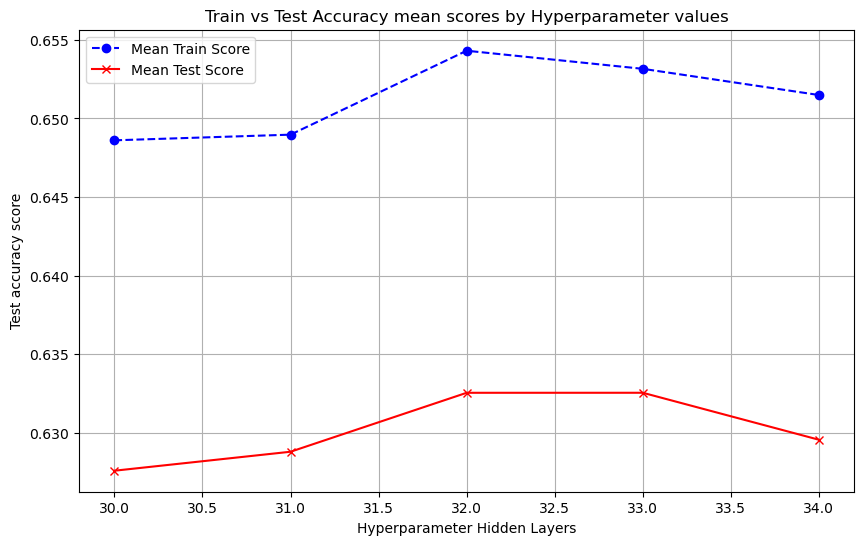

In [32]:
train_result = results_df2['mean_train_score']
test_result = results_df2['mean_test_score']
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_range_2, train_result, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(param_range_2, test_result, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Hyperparameter Hidden Layers')
plt.ylabel('Test accuracy score')
plt.title('Train vs Test Accuracy mean scores by Hyperparameter values')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
y_pred = grid_search2.predict(X_test)

In [34]:
print(f"Train accuracy: {grid_search2.score(X_train, y_train):.3f}")
print(f"Test accuracy: {grid_search2.score(X_test, y_test):.3f}")

Train accuracy: 0.653
Test accuracy: 0.623


In [35]:
import pickle
import numpy as np

In [36]:
# Load the decsion tree model pickle file
file_path = './data/DT.pkl'

In [37]:
with open(file_path, 'rb') as file:
    dt_model = pickle.load(file)

In [38]:
dt_model

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

In [39]:
feature_importances = dt_model.feature_importances_

In [40]:
importance_index = np.where(feature_importances > 0)[0]

In [41]:
X_train_reduced = X_train.iloc[:, importance_index]
X_test_reduced = X_test.iloc[:, importance_index]

In [42]:
X_test_reduced

,age,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Other,medical_specialty_Internal Medicine,medical_specialty_Other,discharge_disposition_AdditonalCare
16960,0.888889,0.070423,0.047619,0.000000,0.000000,0.466667,0,0,1,1
831,0.888889,0.183099,0.000000,0.000000,0.000000,0.400000,0,0,0,1
17888,0.666667,0.084507,0.023810,0.000000,0.000000,0.200000,0,0,1,0
3329,0.777778,0.225352,0.000000,0.000000,0.000000,0.333333,0,0,0,1
5580,0.888889,0.056338,0.071429,0.013158,0.157895,0.533333,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5320,0.888889,0.267606,0.023810,0.000000,0.000000,0.533333,0,0,1,1
16280,0.777778,0.112676,0.000000,0.000000,0.000000,0.533333,0,0,0,0
12965,0.666667,0.253521,0.047619,0.000000,0.000000,0.333333,0,0,0,0
4037,0.777778,0.211268,0.000000,0.000000,0.000000,0.533333,0,0,0,0


In [149]:
# New parameters for the reduced features
param_range_3 = range(5, 65, 5)
new_params = {'hidden_layer_sizes': [(x,) for x in param_range_2], 'alpha': [0.001,0.01,0.1,1,10,100,1000], 'max_iter': [100, 200,500]}

In [150]:
# Train the model with reduced features
grid_search3 = GridSearchCV(mlp_model, cv=5, n_jobs=-1, param_grid=new_params, return_train_score=True)

In [151]:
grid_search3.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=700, random_state=1),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'hidden_layer_sizes': [(30,), (31,), (32,), (33,),
                                                (34,)],
                         'max_iter': [100, 200, 500]},
             return_train_score=True)

In [46]:
grid_search3.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (30,), 'max_iter': 200}

In [47]:
# Accuracy of the model with reduced features
train_accuracy = grid_search3.score(X_train_reduced, y_train)
test_accuracy = grid_search3.score(X_test_reduced, y_test)

In [48]:
print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Train accuracy: 0.632
Test accuracy: 0.629


In [49]:
grid_search3.param_grid

{'hidden_layer_sizes': [(30,), (31,), (32,), (33,), (34,)],
 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'max_iter': [200, 500, 750]}

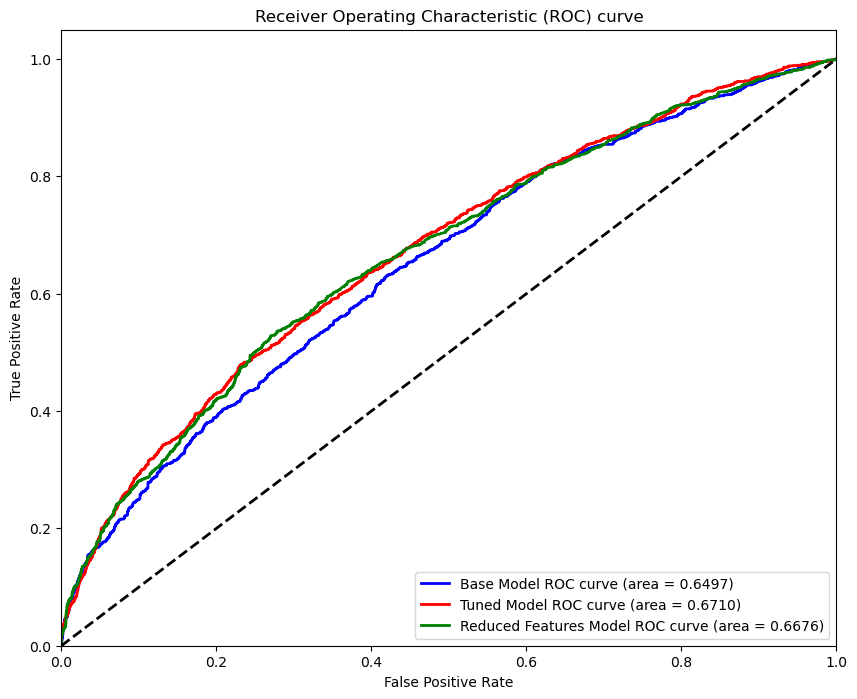

In [148]:
# Generate ROC curves for the three models
from sklearn.metrics import roc_curve, roc_auc_score, auc


# Base model
y_pred_proba = mlp_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Model with hyperparameter tuning
y_pred_proba2 = grid_search2.predict_proba(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2[:, 1])
roc_auc2 = auc(fpr2, tpr2)

# Model with reduced features
y_pred_proba3 = grid_search3.predict_proba(X_test_reduced)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba3[:, 1])
roc_auc3 = auc(fpr3, tpr3)


# Plot the ROC curve

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='Base Model ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Tuned Model ROC curve (area = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Reduced Features Model ROC curve (area = %0.4f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()